In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [6]:
data = pd.read_csv('/amount_sheet - amount_sheet.csv')
data.head()


,S.No,Mall Name,Venue,Amount,Discount,Start hour,End hour
0,1,A,BHOPAL,10000.0,12.0,11:00,22:00
1,2,B,Lucknow,20000.0,13.0,10:30,23:00
2,3,C,Calcutta,50000.0,15.0,09:00,15:30
3,4,D,Hyderabad,60000.0,20.0,12:00,17:00
4,5,E,Patna,19993.0,12.5,06:00,23:00


In [7]:
data['Amount_after_discount'] = data['Amount'] - data['Discount']/100 * data['Amount']

In [79]:
data.head()

,S.No,Mall Name,Venue,Amount,Discount,Start hour,End hour,Amount_after_discount
0,1,A,BHOPAL,10000.0,12.0,11:00,22:00,8800.000
1,2,B,Lucknow,20000.0,13.0,10:30,23:00,17400.000
2,3,C,Calcutta,50000.0,15.0,09:00,15:30,42500.000
3,4,D,Hyderabad,60000.0,20.0,12:00,17:00,48000.000
4,5,E,Patna,19993.0,12.5,06:00,23:00,17493.875


In [81]:
data1 = data.drop(["S.No","Mall Name","Venue","Discount"], axis = 1)

In [82]:
data1.head()

,Amount,Start hour,End hour,Amount_after_discount
0,10000.0,11:00,22:00,8800.000
1,20000.0,10:30,23:00,17400.000
2,50000.0,09:00,15:30,42500.000
3,60000.0,12:00,17:00,48000.000
4,19993.0,06:00,23:00,17493.875


In [11]:
# X = pd.DataFrame(data=data1, columns=['Amount','Discount'])
# y = pd.DataFrame(data=data1, columns=['Amount_after_discount'])

In [88]:
data1.isnull().sum()


Amount                   0
Start hour               0
End hour                 0
Amount_after_discount    0
dtype: int64

In [93]:
data1.describe()

,Amount,Amount_after_discount
count,300.000000,300.000000
mean,39601.526000,32538.079263
std,21964.270405,18810.983412
min,1456.000000,1281.280000
25%,20000.000000,17598.460000
50%,35045.600000,29419.152000
75%,50000.000000,42734.560000
max,100000.000000,87500.000000


In [94]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Amount                 300 non-null    float64
 1   Start hour             300 non-null    object 
 2   End hour               300 non-null    object 
 3   Amount_after_discount  300 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [95]:
print("Total null Amount Values is", data1['Amount'].isnull().values.any())
print("Total null Discounted Amount Values is", data['Amount_after_discount'].isnull().values.any())

Total null Amount Values is False
Total null Discounted Amount Values is False


In [98]:
data2 = data1[['Start hour','End hour']]

In [118]:
# for s in data2['Start hour'] :
#          s = str(s) 
#          s = s.split(":", 1) 
#          s= np.array(s)
#          a= (int)(s[0])
#          b= (int)(s[1])
#          #print(type(a))
#          s = a * 60  + b; 
          
#         #  print("Minutes = ",s )
data2["A_hour"] = pd.to_datetime(data2["Start hour"]).dt.hour
data2["A_min"] = pd.to_datetime(data2["Start hour"]).dt.minute

data2["B_hour"] = pd.to_datetime(data2["End hour"]).dt.hour
data2["B_min"] = pd.to_datetime(data2["End hour"]).dt.minute
data2.head()

,Start hour,End hour,A_hour,A_min,B_hour,B_min
0,11:00,22:00,11,0,22,0
1,10:30,23:00,10,30,23,0
2,09:00,15:30,9,0,15,30
3,12:00,17:00,12,0,17,0
4,06:00,23:00,6,0,23,0


In [119]:
# for i in data2['End hour'] :
#          i = str(i) 
#          i = i.split(":") 
#          a= (int)(i[0])
#          b= (int)(i[1])
#          i = a * 60  + b; 
          
#          #print("Minutes = ",i)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Start hour  300 non-null    object
 1   End hour    300 non-null    object
 2   A_hour      300 non-null    int64 
 3   A_min       300 non-null    int64 
 4   B_hour      300 non-null    int64 
 5   B_min       300 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 14.2+ KB


In [120]:
data1['starting_time'] = data2['A_hour'] *60 + data2['A_min'] 
data1['ending_time'] = data2['B_hour'] *60 + data2['B_min'] 
data1.head()

,Amount,Start hour,End hour,Amount_after_discount,starting_time,ending_time
0,10000.0,11:00,22:00,8800.000,660,1320
1,20000.0,10:30,23:00,17400.000,630,1380
2,50000.0,09:00,15:30,42500.000,540,930
3,60000.0,12:00,17:00,48000.000,720,1020
4,19993.0,06:00,23:00,17493.875,360,1380


In [121]:
final_dataset = data1.drop(["Start hour","End hour"], axis = 1)

In [124]:
final_dataset.head()

,Amount,Amount_after_discount,starting_time,ending_time
0,10000.0,8800.000,660,1320
1,20000.0,17400.000,630,1380
2,50000.0,42500.000,540,930
3,60000.0,48000.000,720,1020
4,19993.0,17493.875,360,1380


In [125]:
final_dataset.shape

(300, 4)

In [126]:
final_dataset.columns

Index(['Amount', 'Amount_after_discount', 'starting_time', 'ending_time'], dtype='object')

In [128]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Amount                 300 non-null    float64
 1   Amount_after_discount  300 non-null    float64
 2   starting_time          300 non-null    int64  
 3   ending_time            300 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [143]:
 X_train = pd.DataFrame(data=final_dataset, columns=['Amount','starting_time','ending_time'])
 y_train = pd.DataFrame(data=final_dataset, columns=['Amount_after_discount'])

In [144]:
X_train

,Amount,starting_time,ending_time
0,10000.0,660,1320
1,20000.0,630,1380
2,50000.0,540,930
3,60000.0,720,1020
4,19993.0,360,1380
...,...,...,...
295,48562.0,570,930
296,87391.0,660,1065
297,17900.0,120,1380
298,45000.0,60,1380


In [145]:
y_train

,Amount_after_discount
0,8800.000
1,17400.000
2,42500.000
3,48000.000
4,17493.875
...,...
295,34479.020
296,76467.125
297,17363.000
298,42750.000


In [146]:
from sklearn.linear_model import LinearRegression

## **Test data set prepare ** *italicized text*

In [147]:
test_data= pd.read_csv('/content/test_datasets.csv.csv')
test_data.head()


,S.No,Mall Name,Venue,Amount,Discount,Start hour,End hour
0,1,A,Bhopal,87391.0,15.0,11:00,22:00
1,2,B,Gwalior,17900.0,12.0,10:30,23:00
2,3,C,Kota,45000.0,12.0,09:00,15:30
3,4,D,Aligarh,12000.0,56.0,12:00,17:00
4,5,E,Venue,30000.0,1.0,06:00,23:00


In [148]:
test_data['Amount_after_discount'] = test_data['Amount'] - test_data['Discount']/100 * test_data['Amount']

test_data1 =test_data.drop(["S.No","Mall Name","Venue","Discount"], axis = 1)

test_data2 = data1[['Start hour','End hour']]


test_data2["A_hour"] = pd.to_datetime(test_data2["Start hour"]).dt.hour
test_data2["A_min"] = pd.to_datetime(test_data2["Start hour"]).dt.minute

test_data2["B_hour"] = pd.to_datetime(test_data2["End hour"]).dt.hour
test_data2["B_min"] = pd.to_datetime(test_data2["End hour"]).dt.minute


test_data1['starting_time'] = test_data2['A_hour'] *60 + test_data2['A_min'] 
test_data1['ending_time'] = test_data2['B_hour'] *60 + test_data2['B_min'] 
test_data1.head()

final_test_dataset = test_data1.drop(["Start hour","End hour"], axis = 1)
final_test_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Amount,Amount_after_discount,starting_time,ending_time
0,87391.0,74282.35,660,1320
1,17900.0,15752.00,630,1380
2,45000.0,39600.00,540,930
3,12000.0,5280.00,720,1020
4,30000.0,29700.00,360,1380


In [149]:
 X_test = pd.DataFrame(data=final_test_dataset, columns=['Amount','starting_time','ending_time'])
 y_test = pd.DataFrame(data=final_test_dataset, columns=['Amount_after_discount'])

In [150]:
X_test

,Amount,starting_time,ending_time
0,87391.0,660,1320
1,17900.0,630,1380
2,45000.0,540,930
3,12000.0,720,1020
4,30000.0,360,1380
5,25000.0,1140,1380
6,40000.0,600,1140
7,10000.0,690,1380
8,20000.0,960,1380
9,50000.0,660,900


In [151]:
y_test

,Amount_after_discount
0,74282.350
1,15752.000
2,39600.000
3,5280.000
4,29700.000
5,17000.000
6,35200.000
7,8800.000
8,11400.000
9,44000.000


In [152]:
regression = LinearRegression()
regression.fit(X_train , y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
y_pred = regression.predict(X_test)


In [156]:
from sklearn.metrics  import r2_score
score = r2_score(y_test,y_pred)

In [157]:
score

0.9522629011172832

In [162]:
regression.score(X_train,y_train)

0.9118863039235922

In [163]:
regression.score(X_test,y_test)

0.9522629011172831

In [158]:
regression.intercept_


array([1425.93750945])

In [159]:

regression.coef_

array([[ 0.81749933, -0.18603521, -0.98242012]])

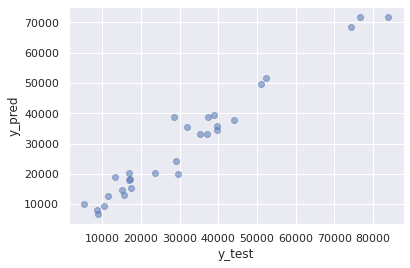

In [166]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [168]:
 
# regression.predict
y_pred

array([68568.97075833, 13117.71305   , 35702.57991429,  9976.9       ,
       19906.6742    , 20384.16245   , 33270.99224   ,  6569.7       ,
       12784.110935  , 37764.055     , 51621.6958    , 17966.0117    ,
       39375.62263333, 71897.34625667, 14604.20949214, 35379.2124    ,
        9507.56      , 24059.0644    , 20155.25903333, 33027.71248   ,
        8016.02857143, 18220.4436    , 38653.47633333, 49789.831     ,
       18985.7853    , 38634.3088    , 71897.34625667, 15438.76093333,
       34403.0526    ])

In [172]:
pd.DataFrame(np.c_[X_test,y_test , y_pred ] , columns =['amount','s_hour','e_hour ','y_test' , 'y_pred' ])

,amount,s_hour,e_hour,y_test,y_pred
0,87391.0,660.0,1320.0,74282.350,68568.970758
1,17900.0,630.0,1380.0,15752.000,13117.713050
2,45000.0,540.0,930.0,39600.000,35702.579914
3,12000.0,720.0,1020.0,5280.000,9976.900000
4,30000.0,360.0,1380.0,29700.000,19906.674200
5,25000.0,1140.0,1380.0,17000.000,20384.162450
6,40000.0,600.0,1140.0,35200.000,33270.992240
7,10000.0,690.0,1380.0,8800.000,6569.700000
8,20000.0,960.0,1380.0,11400.000,12784.110935
9,50000.0,660.0,900.0,44000.000,37764.055000


In [173]:
 regression.score(X_test,y_test)

0.9522629011172831

End of the project ,Prediction gives 95% accurate result with given dataset . THANK YOU